In [1]:
import cv2
import insightface
from insightface.app import FaceAnalysis

In [2]:
# Initialize the face analysis application
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))

/Users/morse/Documents/morse-workspaces/oogway-lab/face-swap/.venv/lib/python3.13/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:123: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/morse/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/morse/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/morse/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/morse/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/morse/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

In [ ]:
import onnxruntime as ort

# Get available ONNX Runtime providers
available_providers = ort.get_available_providers()

# Load the inswapper model with specified providers
swapper = insightface.model_zoo.get_model(
    '../models/inswapper_128.onnx',
    providers=available_providers
)

print("Using providers:", swapper.session.get_providers())

Applied providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'AzureExecutionProvider': {}, 'CoreMLExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]
Using providers: ['CoreMLExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']


In [7]:
# Load source and target images
source_img = cv2.imread("../images/target.png")
target_img = cv2.imread("../images/source.png")

(np.float64(-0.5), np.float64(2999.5), np.float64(1999.5), np.float64(-0.5))

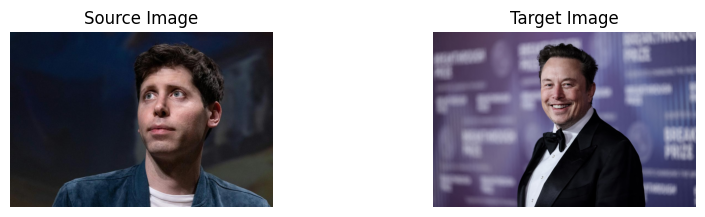

In [8]:
import numpy as np
from matplotlib import pyplot as plt

# Detect faces in source and target images
plt.figure(figsize=(10,5))

# Display source and target images
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
plt.title("Source Image")
plt.axis('off')

# Display target image
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
plt.title("Target Image")
plt.axis('off')

In [9]:
# Detect faces
source_faces = app.get(source_img)
target_faces = app.get(target_img)

# Ensure at least one face is detected in both images
if len(source_faces) == 0:
    raise Exception("No face found in source image")
if len(target_faces) == 0:
    raise Exception("No face found in target image")

In [10]:
# Select the first face in the source image
source_face = source_faces[0]

# Select the largest face in the target image
target_face = max(
    target_faces,
    key=lambda f: (f.bbox[2]-f.bbox[0]) * (f.bbox[3]-f.bbox[1])
)

In [11]:
def draw_face_rect(img, face):
    x1, y1, x2, y2 = face.bbox.astype(int)
    img_copy = img.copy()
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return img_copy

# Draw rectangles around detected faces
source_img_box = draw_face_rect(source_img, source_face)
target_img_box = draw_face_rect(target_img, target_face)

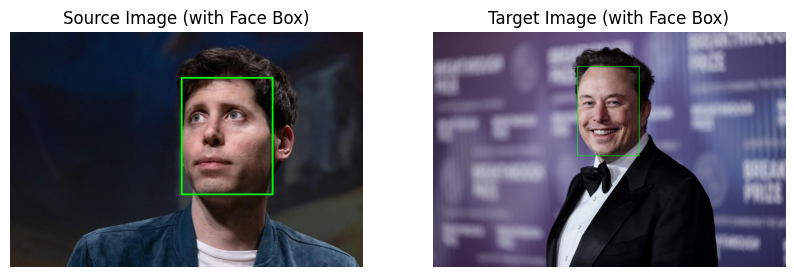

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(source_img_box, cv2.COLOR_BGR2RGB))
plt.title("Source Image (with Face Box)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(target_img_box, cv2.COLOR_BGR2RGB))
plt.title("Target Image (with Face Box)")
plt.axis('off')

plt.show()

In [13]:
# Perform face swapping
result = swapper.get(target_img, target_face, source_face)

(np.float64(-0.5), np.float64(2999.5), np.float64(1999.5), np.float64(-0.5))

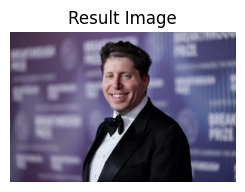

In [14]:
# Display result image
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Result Image")
plt.axis('off')